In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")

data_path = '/opt/airflow/data/raw/us_airline_sentiment_raw.csv'

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print(f" Données chargées : {len(df)} avis.")
else:
    print(" Erreur .")


 Données chargées : 14640 avis.


In [12]:
print("------> Répartition des Sentiments ")
sentiment_counts = df['airline_sentiment'].value_counts()
print(sentiment_counts)
print("\nEn pourcentage :")
print(df['airline_sentiment'].value_counts(normalize=True) * 100)


------> Répartition des Sentiments 
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

En pourcentage :
airline_sentiment
negative    62.691257
neutral     21.168033
positive    16.140710
Name: proportion, dtype: float64


In [13]:

print("\n--- Nombre d'avis par Compagnie ---")
print(df['airline'].value_counts())



--- Nombre d'avis par Compagnie ---
airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


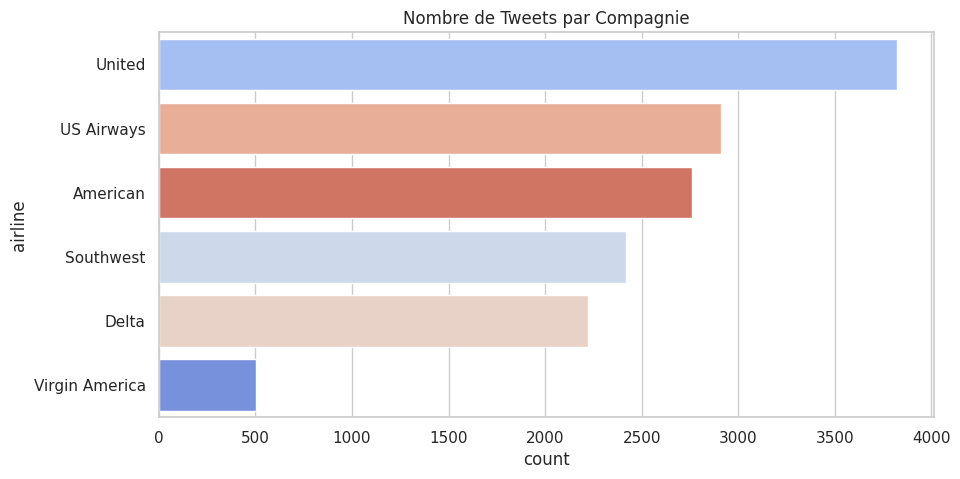

In [14]:

plt.figure(figsize=(10, 5))
sns.countplot(
    y='airline',
    data=df,
    order=df['airline'].value_counts().index,
    hue='airline',
    palette='coolwarm',
    legend=False
)
plt.title('Nombre de Tweets par Compagnie')
plt.show()

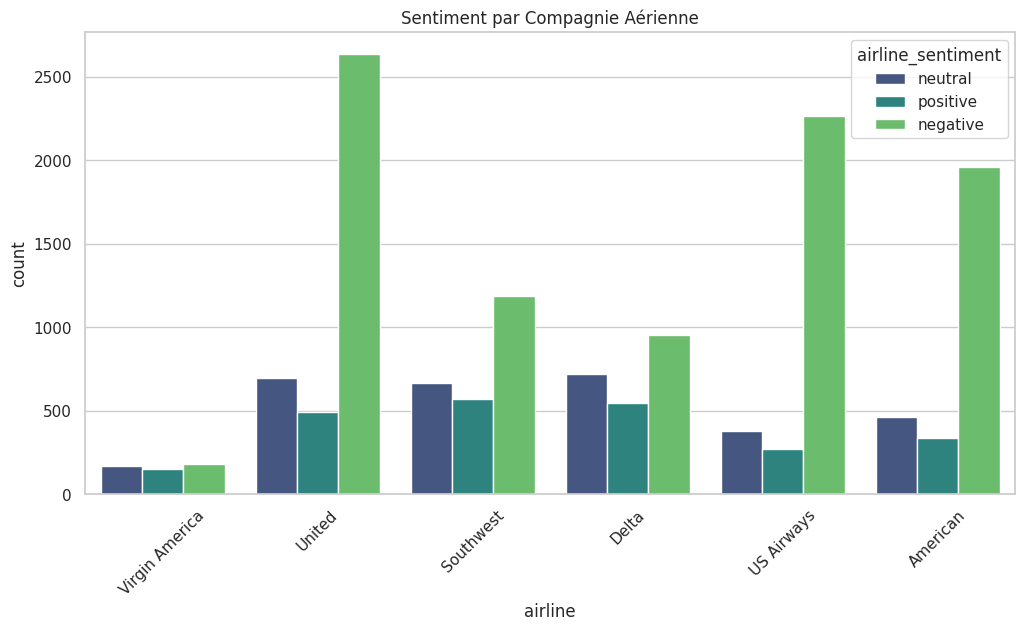

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette='viridis')
plt.title('Sentiment par Compagnie Aérienne')
plt.xticks(rotation=45)
plt.show()

In [16]:
print("\n--- Valeurs Manquantes ---")
print(df.isnull().sum())


--- Valeurs Manquantes ---
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


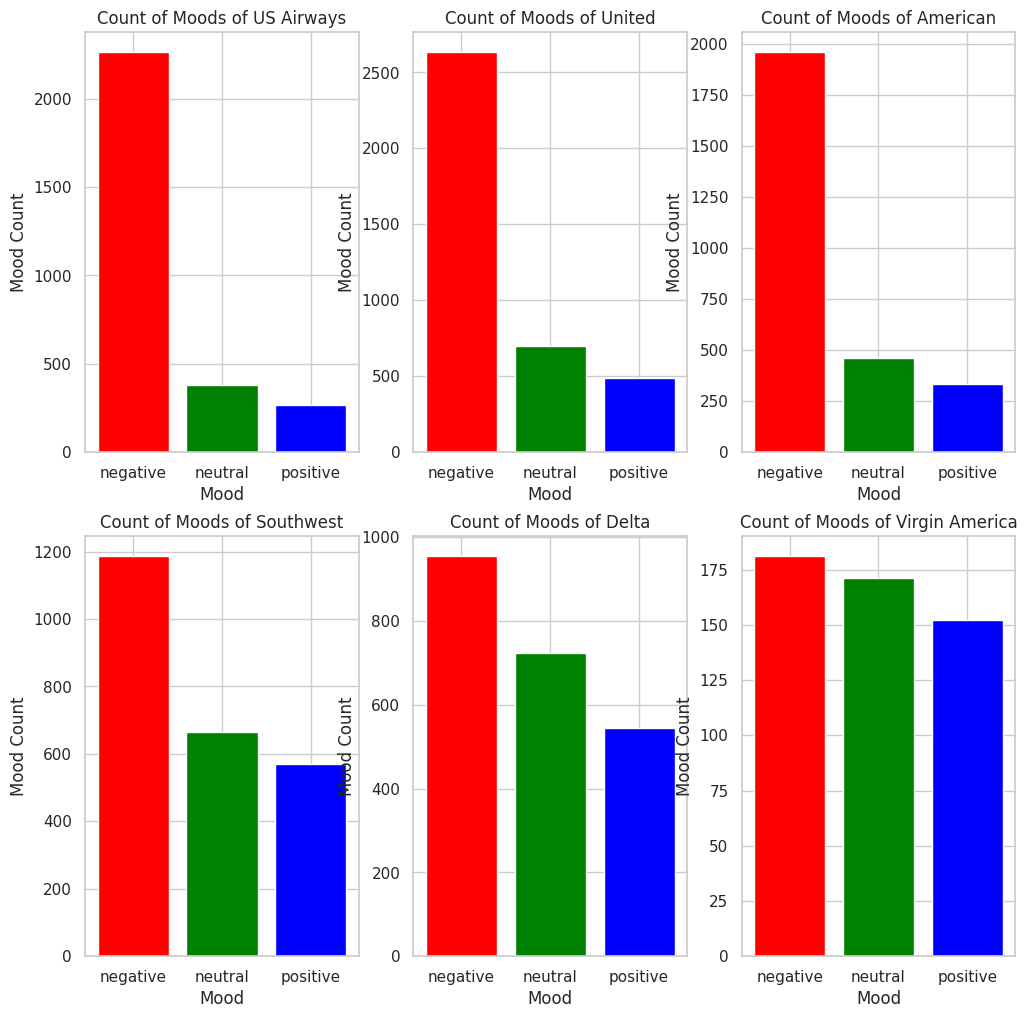

In [17]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)